# Introduction

As a junior data analyst on the marketing team at Bellabeat, I have been tasked by the company's founder, Urška Sršen, to analyze smart device data for one of Bellabeat's products. The goal is to gain valuable insights into how consumers are using their smart devices, which can be used to guide the company's marketing strategy. Throughout this analysis, I aim to showcase the data analytic process of asking questions, preparing data, processing data, analyzing data, and providing high-level recommendations.

# Company

Bellabeat is a thriving small business co-founded by Urška Sršen, who also serves as the company's Chief Creative Officer. Together with Sando Mur, she founded the high-tech company, which specializes in producing health-focused smart products such as Leaf, Time, Spring, Bellabeat membership, and the Bellabeat app. The company sells its products through both online retailers and their own e-commerce channel on their website. While Bellabeat has already made investments in advertising media, their primary focus is on digital marketing.

# Ask

CEO Sršen asked me to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. 

Following are the basic asks which my CEO wants me to analyze and present it.
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# Prepare

My seniors encouraged me to use the "FitBit Fitness Tracker Data" dataset, which is available on the open-sourced platform Kaggle. This dataset contains personal tracker data for 30 randomly selected Fitbit users, including minute-level output for physical activity, heart rate, and sleep monitoring. The data is organized in Narrow format and includes information about daily activity, steps, and heart rate.

The dataset has been properly scrubbed to protect the users' privacy and is almost fully comprehensive, providing most of the information needed for my project. However, it does not include any data specifically related to stress, which is a focus of many Bellabeat products. Additionally, the data has not been updated in 2 years, making it somewhat outdated. Nonetheless, proper citation has been provided for the dataset.

# Process

Let's import python libraries.
And, needed dataset which will use for further analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [166]:
df1=pd.read_csv('dailyActivity_merged.csv')
df2=pd.read_csv('heartrate_seconds_merged.csv')
df6=pd.read_csv('sleepDay_merged.csv')
df7=pd.read_csv('weightLogInfo_merged.csv')

In [260]:
df1

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,dayOfWeek,TotalMinutes,Date
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,Tuesday,1094,2016-04-12
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,Wednesday,1033,2016-04-13
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Thursday,1440,2016-04-14
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,Friday,998,2016-04-15
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,Saturday,1040,2016-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Sunday,1440,2016-05-08
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,Monday,1440,2016-05-09
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Tuesday,1440,2016-05-10
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,Wednesday,1440,2016-05-11


In [168]:
df1.isnull().sum()
df1.duplicated().sum()

0

In [169]:
df2

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101
...,...,...,...
2483653,8877689391,5/12/2016 2:43:53 PM,57
2483654,8877689391,5/12/2016 2:43:58 PM,56
2483655,8877689391,5/12/2016 2:44:03 PM,55
2483656,8877689391,5/12/2016 2:44:18 PM,55


In [170]:
df2['Date']=df2['Time'].str.split().str[0]
df2['Time']=df2['Time'].str.split().str[1]+df2['Time'].str.split().str[2]

In [171]:
df2

,Id,Time,Value,Date
0,2022484408,7:21:00AM,97,4/12/2016
1,2022484408,7:21:05AM,102,4/12/2016
2,2022484408,7:21:10AM,105,4/12/2016
3,2022484408,7:21:20AM,103,4/12/2016
4,2022484408,7:21:25AM,101,4/12/2016
...,...,...,...,...
2483653,8877689391,2:43:53PM,57,5/12/2016
2483654,8877689391,2:43:58PM,56,5/12/2016
2483655,8877689391,2:44:03PM,55,5/12/2016
2483656,8877689391,2:44:18PM,55,5/12/2016


In [172]:
df2.isnull().sum()
df2.duplicated().sum()

0

In [180]:
df6
df6['Date']=df6['SleepDay'].str.split().str[0]

In [181]:
df6=df6[['Id','TotalSleepRecords','TotalMinutesAsleep','TotalTimeInBed','Date']]
df6

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date
0,1503960366,1,327,346,4/12/2016
1,1503960366,2,384,407,4/13/2016
2,1503960366,1,412,442,4/15/2016
3,1503960366,2,340,367,4/16/2016
4,1503960366,1,700,712,4/17/2016
...,...,...,...,...,...
408,8792009665,1,343,360,4/30/2016
409,8792009665,1,503,527,5/1/2016
410,8792009665,1,415,423,5/2/2016
411,8792009665,1,516,545,5/3/2016


In [182]:
df6.isnull().sum()
df6.duplicated().sum()

3

In [183]:
df6.drop_duplicates(keep='first',inplace=True)

In [184]:
df6.duplicated().sum()

0

As previous data suggest that their is differences  in TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed on each day so it shows that user haven't used smart device on duplicate record day it can be a reason due to technical error it wasn't working.Therefore it's better to remove duplicate data.

In [185]:
df7.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [186]:
df7.isnull().sum()
df7.duplicated().sum()

0

In [187]:
df7.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [188]:
df7[~df7['Fat'].isnull()]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
5,4319703577,4/17/2016 11:59:59 PM,72.400002,159.614681,25.0,27.450001,True,1460937599000


AS, we can see 67 out off only 2 values is non null and rest of is null shows that there is no authenticate data for fat column. S, therefore it's better to skip fat column because it doesn't make much difference to it. Otherwise we can do average of non null values and can replace with null values but it doesn't adds value to data quality.

In [189]:
df7=df7[['Id','Date','WeightKg','WeightPounds','BMI','IsManualReport','LogId']]

In [190]:
df7

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000
...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,25.559999,False,1462949507000


In [191]:
df7.isnull().sum()

Id                0
Date              0
WeightKg          0
WeightPounds      0
BMI               0
IsManualReport    0
LogId             0
dtype: int64

# Analyze

In [192]:
df1['ActivityDate'] = pd.to_datetime(df1['ActivityDate'])
df1['dayOfWeek'] = df1['ActivityDate'].dt.day_name()
df1
df1['TotalMinutes']=df1['VeryActiveMinutes']+df1['FairlyActiveMinutes']+df1['LightlyActiveMinutes']+df1['SedentaryMinutes']

In [193]:
ad=df1[['LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','Calories']]
#ad=df1.corr()
#ad=ad.unstack()

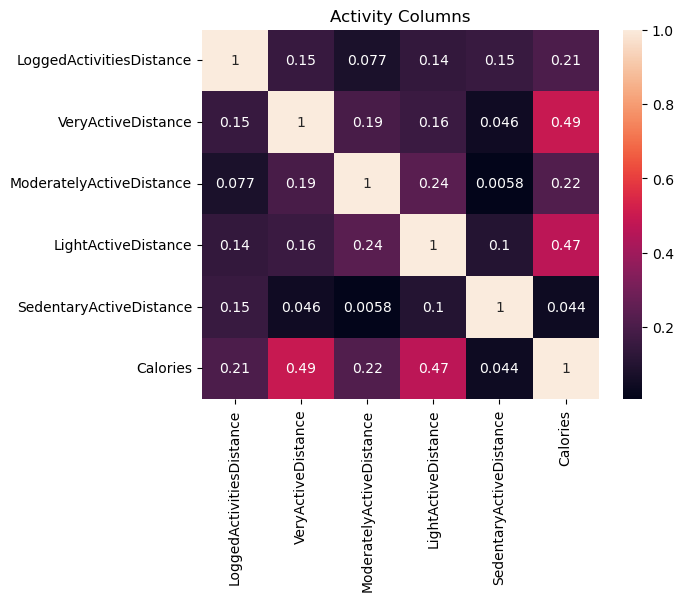

In [194]:
plt.xlabel("Activity Features")
plt.ylabel("Activity Features")
plt.title("Activity Columns")
sns.heatmap(ad.corr(),annot=True)
plt.show()

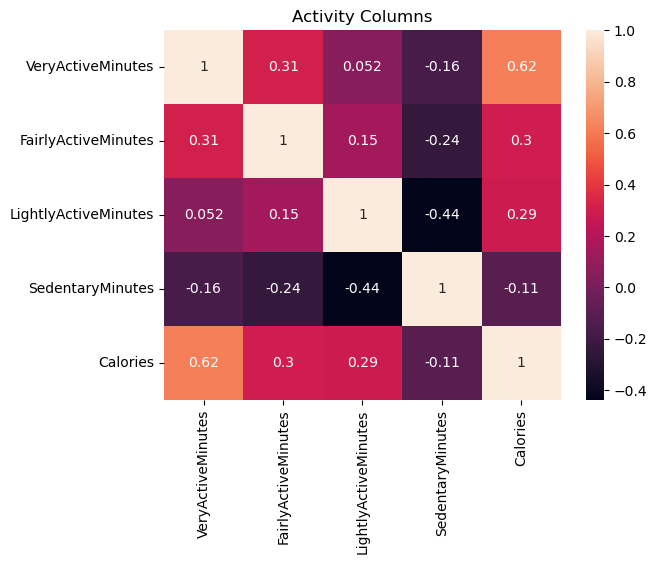

In [195]:
ad1=df1[['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']]
plt.xlabel("Activity Features")
plt.ylabel("Activity Features")
plt.title("Activity Columns")
sns.heatmap(ad1.corr(),annot=True)
plt.show()

Suprisingly, Very Active Minutes is more corelated than Very Active Distance to calories.
More the distance covered that much calories burns that the basic understanding, but more specifically very active distance/Minutes.

In [256]:
corr=df1[['TotalSteps','Calories']]

<AxesSubplot:xlabel='Calories', ylabel='TotalSteps'>

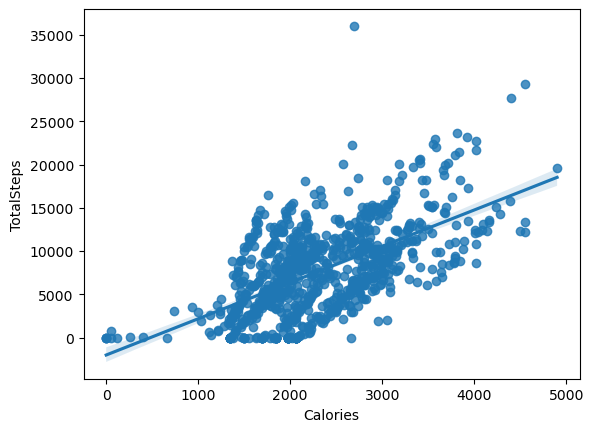

In [258]:
sns.regplot(y="TotalSteps", x="Calories", data=df1)

More the steps by user more calories are burned.

In [306]:
df6[df6['TotalMinutesAsleep']>df6['TotalTimeInBed']]

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='TotalTimeInBed'>

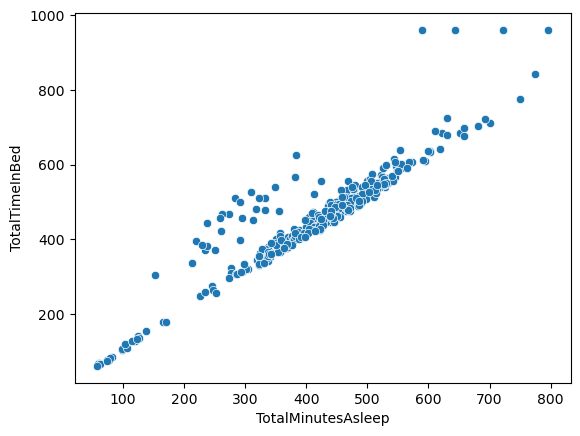

In [307]:
sns.scatterplot(df6['TotalMinutesAsleep'],df6['TotalTimeInBed'])

Their is no much difference in sleep time and asleep time. Both are uniform.

In [231]:
g1=df2.groupby(by=['Id','Date'])
g1=g1.mean().reset_index()
g1['Date']=g1['Date'].str.replace('/','-')
g1['Date']=g1['Date'].apply(pd.to_datetime)

In [242]:
df1['Date']=df1['ActivityDate']
g1=df1.merge(g1,on=['Id','Date'],how='inner')

In [253]:
g1.groupby(by='dayOfWeek').mean().sort_values(by='Value').reset_index()[['dayOfWeek','Value']]

,dayOfWeek,Value
0,Wednesday,76.970091
1,Thursday,77.893759
2,Tuesday,78.314073
3,Friday,78.401859
4,Sunday,78.764631
5,Monday,79.264095
6,Saturday,81.246616


Average heart beats per seconds for respective weeks days.

# Share 

In [196]:
df7.sort_values(by='BMI',ascending=False)

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000
12,5577150313,4/17/2016 9:17:55 AM,90.699997,199.959265,28.000000,False,1460884675000
8,4558609924,4/25/2016 11:59:59 PM,70.300003,154.984977,27.459999,True,1461628799000
5,4319703577,4/17/2016 11:59:59 PM,72.400002,159.614681,27.450001,True,1460937599000
6,4319703577,5/4/2016 11:59:59 PM,72.300003,159.394222,27.379999,True,1462406399000
...,...,...,...,...,...,...,...
30,6962181067,4/30/2016 11:59:59 PM,61.000000,134.481980,23.820000,True,1462060799000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000


In [201]:
df7['BMI_Describe']=''
df7['BMI']=round(df7['BMI'].astype('int'),1)
count=0
for i in df7['BMI']:
    if i>18.5 and i<25:
        df7['BMI_Describe'][count]='Normal'
    elif i<=18.5:
        df7['BMI_Describe'][count]='Underweight'
    elif i>=25 and i<30:
        df7['BMI_Describe'][count]='Overweight'
    elif i>=30 and i<35:
        df7['BMI_Describe'][count]='Obese'
    else:
        df7['BMI_Describe'][count]='Extreme obese'
    count+=1

C:\Users\DELL\AppData\Local\Temp\ipykernel_9380\2763698403.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['BMI_Describe'][count]='Normal'
C:\Users\DELL\AppData\Local\Temp\ipykernel_9380\2763698403.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['BMI_Describe'][count]='Extreme obese'
C:\Users\DELL\AppData\Local\Temp\ipykernel_9380\2763698403.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['BMI_Describe'][count

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI_Describe', ylabel='count'>

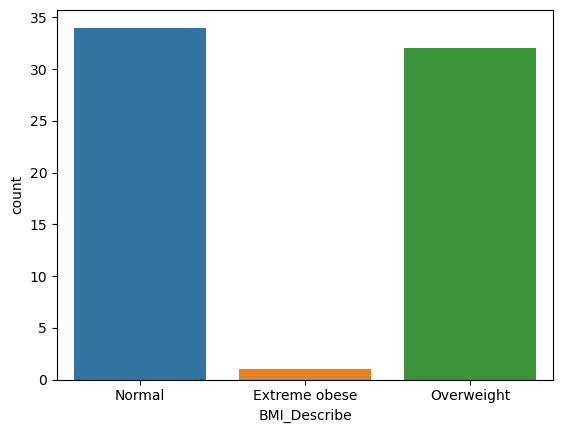

In [203]:
sns.countplot(df7['BMI_Describe'])

In [90]:
tem=df1.groupby(by=['dayOfWeek'])
tem1=df1.groupby(by=['dayOfWeek'])

In [91]:
tem=tem.sum().reset_index().sort_values(by='TotalMinutes',ascending=True)[['dayOfWeek','TotalSteps','TotalDistance','TrackerDistance','TotalMinutes','Calories']]

In [38]:
tem[['dayOfWeek','TotalMinutes']]

,dayOfWeek,TotalMinutes
3,Sunday,145048
2,Saturday,149860
1,Monday,150853
0,Friday,155821
4,Thursday,173281
6,Wednesday,181982
5,Tuesday,188783


In [39]:
tem1=tem1.sum().reset_index().sort_values(by='Calories',ascending=True)[['dayOfWeek','TotalSteps','TotalDistance','TrackerDistance','TotalMinutes','Calories']]

In [40]:
tem1[['dayOfWeek','Calories']]

,dayOfWeek,Calories
3,Sunday,273823
1,Monday,278905
2,Saturday,292016
0,Friday,293805
4,Thursday,323337
6,Wednesday,345393
5,Tuesday,358114


In [386]:
df=df1.groupby(by=['dayOfWeek'])

In [387]:
df=df.mean().reset_index()
df=df[['dayOfWeek','SedentaryMinutes']].sort_values(by='SedentaryMinutes')

In [400]:
df

,dayOfWeek,SedentaryMinutes
4,Thursday,961.993197
2,Saturday,964.282258
6,Wednesday,989.480000
3,Sunday,990.256198
0,Friday,1000.309524
5,Tuesday,1007.361842
1,Monday,1027.941667


# Act

1) Some users have a high number of sedentary minutes on their working days, indicating that they have a desk job and spend over 75% of their day sitting. On Wednesdays, the average sedentary minutes are the highest, followed by Tuesdays and Thursdays. To address this issue, a new feature could be introduced to monitor their activity and notify them if they have been sitting for an extended period (e.g., 1 hour), suggesting that they engage in physical activities such as walking or rotating their hands.

2) During weekends, the average number of calories burned and total minutes used are the lowest compared to the rest of the week. Therefore, to effectively market any fitness device, it would be best to target weekends when fewer Fitbit device users are active. This would make it easier to attract new customers who are less likely to be distracted by other brands.

3) Some users have a BMI index that indicates they are either overweight or have high obesity. To support their health, we can provide options for healthy daily activities and encourage them to manage their routine, such as setting a goal for 20 minutes of daily exercise and receiving guidance on their diet. If they fail to complete a task, a notification can remind them to continue. Users who are on a diet can also edit their day-to-day routine to incorporate their daily activity plans. 

4) As a customer, my recommendation for fitness devices would be to prioritize ease of use, comfort, and aesthetics to enhance user engagement and motivation. Additionally, including customizable goals and social features such as challenges, leaderboards, and the ability to connect with friends can foster a sense of community and further motivate users to achieve their goals.

5) Surprisingly, there is a stronger correlation between Very Active Minutes and calories burned than between Very Active Distance and calories burned. While it is commonly understood that more distance covered equates to more calories burned, it is actually the very active distance/minutes that have a more significant impact on calorie burn. Additionally, there is not a significant difference between sleep time and asleep time, as both remain relatively uniform.



